In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
ev_sales = pd.read_csv("E:\DATA\Projects\Vehicle Sales\EV_Sales_Dataset.csv")
car_models = pd.read_csv("E:\DATA\Projects\Vehicle Sales\Vehicle_Models_India.csv")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ashwi\AppData\Local\Temp\ipykernel_13436\1346526905.py:1: SyntaxWarning: invalid escape sequence '\D'
  ev_sales = pd.read_csv("E:\DATA\Projects\Vehicle Sales\EV_Sales_Dataset.csv")
C:\Users\ashwi\AppData\Local\Temp\ipykernel_13436\1346526905.py:2: SyntaxWarning: invalid escape sequence '\D'
  car_models = pd.read_csv("E:\DATA\Projects\Vehicle Sales\Vehicle_Models_India.csv")


In [3]:
print(ev_sales.head())
print(car_models.head())

     Year Month_Name      Date           State         Vehicle_Class  \
0  2014.0        jan  1/1/2014  Andhra Pradesh       ADAPTED VEHICLE   
1  2014.0        jan  1/1/2014  Andhra Pradesh  AGRICULTURAL TRACTOR   
2  2014.0        jan  1/1/2014  Andhra Pradesh             AMBULANCE   
3  2014.0        jan  1/1/2014  Andhra Pradesh   ARTICULATED VEHICLE   
4  2014.0        jan  1/1/2014  Andhra Pradesh                   BUS   

  Vehicle_Category Vehicle_Type  EV_Sales_Quantity  
0           Others       Others                0.0  
1           Others       Others                0.0  
2           Others       Others                0.0  
3           Others       Others                0.0  
4              Bus          Bus                0.0  
    Brand    Model  Launch Year             Segment   Fuel Type  Variants  \
0   Honda    Amaze         2019               Sedan      Petrol        12   
1  Nissan  Magnite         2019  Electric Hatchback      Petrol         3   
2    Tata  Harrier

In [4]:
# Data Cleaning

In [5]:
ev_sales.isnull().sum()

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

In [6]:
ev_sales.dropna(how = 'all', inplace = True)

In [7]:
ev_sales['Year'] = ev_sales['Year'].astype(int)

In [8]:
ev_sales['EV_Sales_Quantity'] = ev_sales['EV_Sales_Quantity'].replace(',', "", regex=True).astype(int)

In [9]:
ev_sales = ev_sales[ev_sales["EV_Sales_Quantity"] >0]

In [10]:
sales_by_year = ev_sales.groupby('Year')['EV_Sales_Quantity'].sum().reset_index()

In [11]:
sales_by_state = ev_sales.groupby('State')["EV_Sales_Quantity"].sum().reset_index()

In [12]:
sales_by_class = ev_sales.groupby('Vehicle_Class')['EV_Sales_Quantity'].sum().reset_index()

In [13]:
car_models.drop_duplicates(inplace=True)
car_models.dropna(subset=['Model'], inplace = True)

In [14]:
def clean_price(value):
    if pd.isna(value): return None
    value = str(value).replace("₹", "").replace(',', '').strip()
    if '-' in value:
        low, high = value.split('-')
        return(float(low), float(high))
    try:
        return float(value)
    except:
        return None

In [15]:
car_models.rename(columns = {'ex_showroom_price_(₹_lakhs)': 'Ex_Showroom_Price'}, inplace = True)

In [16]:
car_models['Price_Range'] = car_models['Ex-Showroom Price (₹ Lakhs)'].apply(clean_price)
car_models["Min_Price"] = car_models["Price_Range"].apply(lambda x: x[0] if isinstance(x, tuple) else x)
car_models["Max_Price"] = car_models["Price_Range"].apply(lambda x: x[1] if isinstance(x, tuple) else x)

In [17]:
car_models["Launch Year"] = pd.to_numeric(car_models["Launch Year"], errors="coerce")

In [18]:
car_models["Is_EV"] = car_models["Fuel Type"].str.contains("Electric", case=False, na=False)

In [19]:
import re
def extract_number(text):
    if pd.isna(text): return None
    match = re.search(r"(\d+\.?\d*)", str(text))
    return float(match.group(1)) if match else None

car_models["Mileage_or_Range"] = car_models["Battery / Mileage"].apply(extract_number)

In [20]:
def period(year):
    if year < 2019: return "2014–2018"
    elif year < 2022: return "2019–2021"
    else: return "2022–2024"

car_models["Launch_Period"] = car_models["Launch Year"].apply(period)

In [21]:
print(ev_sales.groupby("Year")["EV_Sales_Quantity"].sum())

Year
2014       2392
2015       7805
2016      49855
2017      87420
2018     130254
2019     166819
2020     124684
2021     331498
2022    1024723
2023    1525179
2024     143182
Name: EV_Sales_Quantity, dtype: int64


In [22]:
print(car_models[["Brand","Model","Is_EV","Min_Price","Mileage_or_Range"]].head())

    Brand    Model  Is_EV  Min_Price  Mileage_or_Range
0   Honda    Amaze  False        6.0              20.1
1  Nissan  Magnite  False        6.0              24.1
2    Tata  Harrier  False        7.0              22.0
3      MG    Astor  False        6.0              21.4
4  Nissan    Kicks  False       10.0              25.2


In [23]:
# Exploratory Data Analysis

In [24]:
print(ev_sales.info())

<class 'pandas.core.frame.DataFrame'>
Index: 14062 entries, 13 to 96841
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               14062 non-null  int64 
 1   Month_Name         14062 non-null  object
 2   Date               14062 non-null  object
 3   State              14062 non-null  object
 4   Vehicle_Class      14062 non-null  object
 5   Vehicle_Category   14062 non-null  object
 6   Vehicle_Type       14062 non-null  object
 7   EV_Sales_Quantity  14062 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 988.7+ KB
None


In [25]:
print(ev_sales.describe())

               Year  EV_Sales_Quantity
count  14062.000000       14062.000000
mean    2020.166619         255.568980
std        2.554917        1107.675407
min     2014.000000           1.000000
25%     2018.000000           2.000000
50%     2021.000000          12.000000
75%     2022.000000          82.000000
max     2024.000000       20584.000000


In [26]:
print(ev_sales.head())

     Year Month_Name      Date           State    Vehicle_Class  \
13   2014        jan  1/1/2014  Andhra Pradesh  M-CYCLE/SCOOTER   
102  2014        jan  1/1/2014    Chhattisgarh  M-CYCLE/SCOOTER   
153  2014        jan  1/1/2014           Delhi  M-CYCLE/SCOOTER   
157  2014        jan  1/1/2014           Delhi        MOTOR CAR   
173  2014        jan  1/1/2014             Goa        MOTOR CAR   

    Vehicle_Category Vehicle_Type  EV_Sales_Quantity  
13        2-Wheelers  2W_Personal                  1  
102       2-Wheelers  2W_Personal                 10  
153       2-Wheelers  2W_Personal                  2  
157       4-Wheelers  4W_Personal                  5  
173       4-Wheelers  4W_Personal                  1  


In [27]:
sales_by_year = ev_sales.groupby('Year')['EV_Sales_Quantity'].sum().reset_index()
print(sales_by_year)

    Year  EV_Sales_Quantity
0   2014               2392
1   2015               7805
2   2016              49855
3   2017              87420
4   2018             130254
5   2019             166819
6   2020             124684
7   2021             331498
8   2022            1024723
9   2023            1525179
10  2024             143182


In [28]:
import matplotlib.pyplot as plt

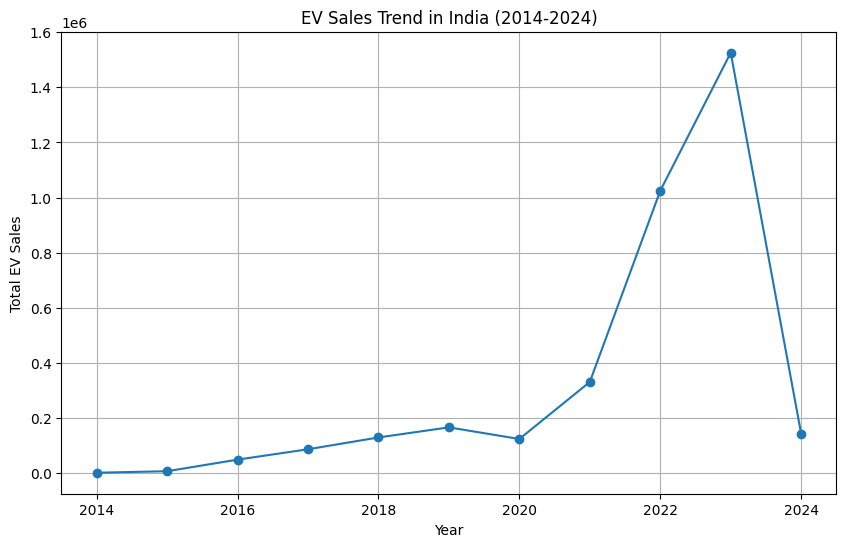

In [29]:
plt.figure(figsize=(10,6))
plt.plot(sales_by_year['Year'], sales_by_year['EV_Sales_Quantity'], marker='o')
plt.title('EV Sales Trend in India (2014-2024)')
plt.xlabel('Year')
plt.ylabel('Total EV Sales')
plt.grid(True)
plt.show()

In [30]:
sales_by_class = ev_sales.groupby('Vehicle_Class')['EV_Sales_Quantity'].sum().reset_index()

sales_by_class.sort_values('EV_Sales_Quantity', ascending=False, inplace=True)
print(sales_by_class)

                               Vehicle_Class  EV_Sales_Quantity
18                           M-CYCLE/SCOOTER            1697373
10                             E-RICKSHAW(P)            1408127
24                                 MOTOR CAR             130676
9                   E-RICKSHAW WITH CART (G)              90656
37                 THREE WHEELER (PASSENGER)              76132
22                                     MOPED              61253
36                     THREE WHEELER (GOODS)              44974
29               MOTORISED CYCLE (CC > 25CC)              36390
23                                 MOTOR CAB              18681
27         MOTOR CYCLE/SCOOTER-USED FOR HIRE              11765
4                                        BUS               6891
15                             GOODS CARRIER               6322
19             M-CYCLE/SCOOTER-WITH SIDE CAR               1324
42                      TRAILER (COMMERCIAL)                565
7             CONSTRUCTION EQUIPMENT VEH

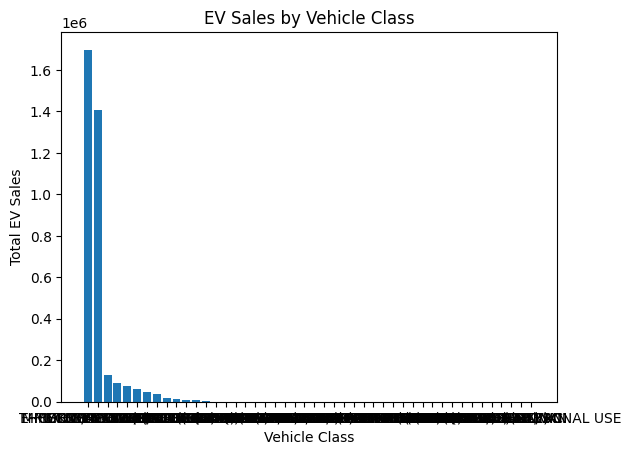

In [31]:
plt.Figure(figsize=(10,6))
plt.bar(sales_by_class['Vehicle_Class'], sales_by_class['EV_Sales_Quantity'])
plt.title('EV Sales by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Total EV Sales')
plt.show()

In [32]:
top_sates = (ev_sales.groupby('State')['EV_Sales_Quantity'].sum()
             .reset_index().sort_values('EV_Sales_Quantity', ascending = False).head(10))
print(top_sates)

            State  EV_Sales_Quantity
31  Uttar Pradesh             732074
19    Maharashtra             401535
15      Karnataka             315498
8           Delhi             268538
27      Rajasthan             228573
4           Bihar             213465
29     Tamil Nadu             206902
10        Gujarat             176713
3           Assam             151917
16         Kerala             133246


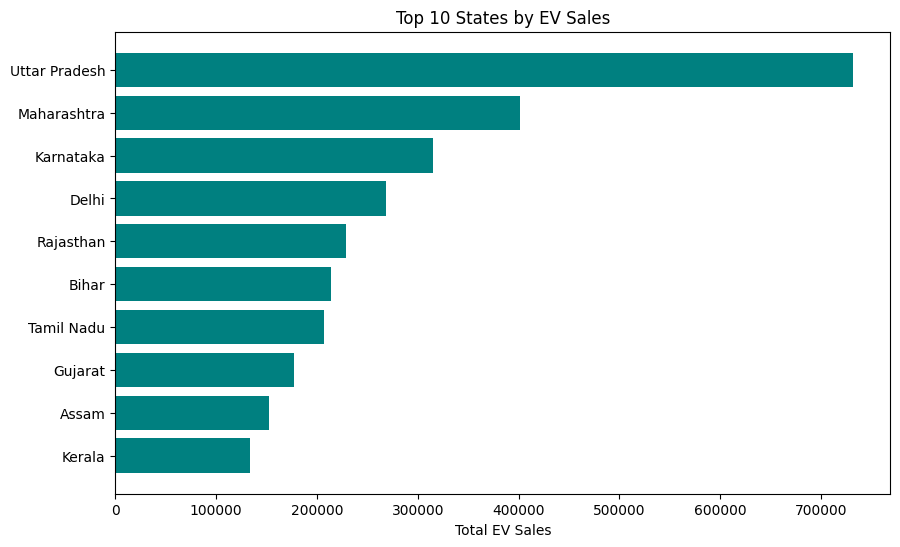

In [33]:
plt.figure(figsize=(10,6))
plt.barh(top_sates['State'], top_sates['EV_Sales_Quantity'], color='teal')
plt.title('Top 10 States by EV Sales')
plt.xlabel('Total EV Sales')
plt.gca().invert_yaxis()
plt.show()

In [34]:
print(car_models.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Brand                        15000 non-null  object 
 1   Model                        15000 non-null  object 
 2   Launch Year                  15000 non-null  int64  
 3   Segment                      15000 non-null  object 
 4   Fuel Type                    15000 non-null  object 
 5   Variants                     15000 non-null  int64  
 6   Ex-Showroom Price (₹ Lakhs)  15000 non-null  object 
 7   Monthly Sales (Units)        15000 non-null  int64  
 8   Is EV?                       15000 non-null  object 
 9   Battery / Mileage            15000 non-null  object 
 10  Notable Features             15000 non-null  object 
 11  Price_Range                  15000 non-null  object 
 12  Min_Price                    15000 non-null  float64
 13  Max_Price       

In [35]:
print(car_models.describe())

        Launch Year      Variants  Monthly Sales (Units)     Min_Price  \
count  15000.000000  15000.000000           15000.000000  15000.000000   
mean    2018.991067     13.174000            8664.002200      7.985060   
std        2.592753      7.200239            4941.852964      5.837377   
min     2015.000000      1.000000             150.000000      3.500000   
25%     2017.000000      7.000000            4563.000000      4.200000   
50%     2019.000000     13.000000            8521.500000      7.000000   
75%     2021.000000     19.000000           12368.000000     10.000000   
max     2023.000000     25.000000           19993.000000     36.000000   

          Max_Price  Mileage_or_Range  
count  15000.000000      15000.000000  
mean      21.829173         46.135080  
std       20.316759         90.593381  
min        8.500000         15.000000  
25%       11.050000         18.900000  
50%       18.000000         21.700000  
75%       25.000000         24.500000  
max      130.

Is_EV
False    13881
True      1119
Name: count, dtype: int64


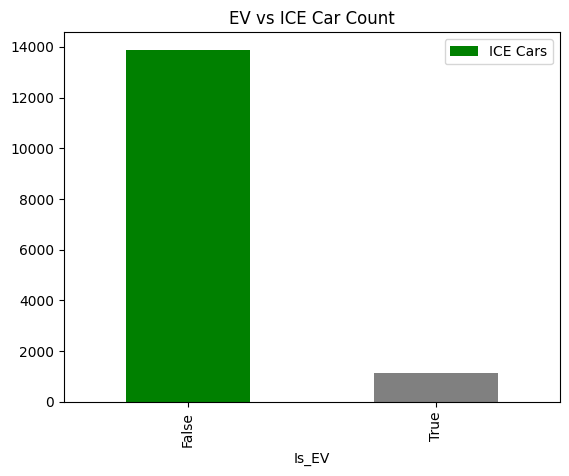

In [36]:
ev_counts = car_models['Is_EV'].value_counts()
print(ev_counts)
ev_counts.plot(kind = 'bar', color = ['green', 'grey'], title = 'EV vs ICE Car Count')
plt.legend(['ICE Cars', 'EVs'])
plt.show()

In [37]:
avg_price = car_models.groupby('Is_EV')[['Min_Price', 'Max_Price']].mean().reset_index()
print(avg_price)

   Is_EV  Min_Price  Max_Price
0  False   7.861357  21.321843
1   True   9.519571  28.122520


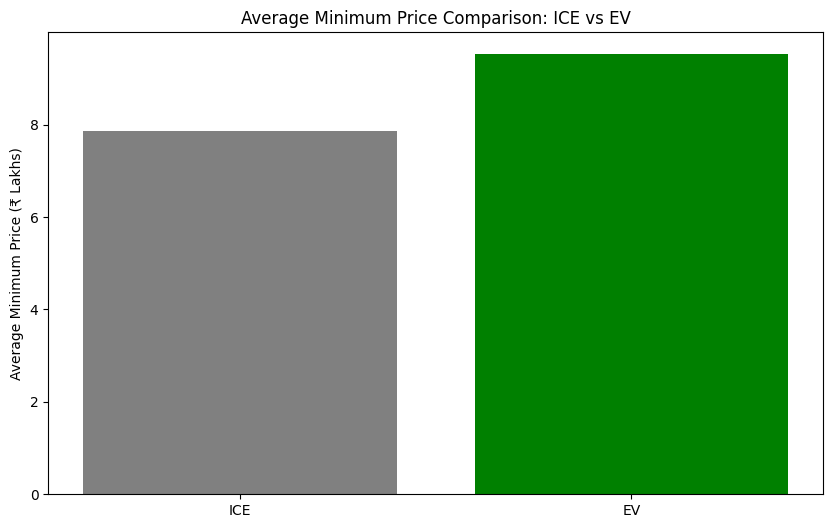

In [38]:
plt.figure(figsize=(10,6))
plt.bar(['ICE', 'EV'], avg_price['Min_Price'], color = ['grey', 'green'])
plt.title('Average Minimum Price Comparison: ICE vs EV')
plt.ylabel('Average Minimum Price (₹ Lakhs)')
plt.show()

   Is_EV  Mileage_or_Range
0  False         21.316850
1   True        354.000894


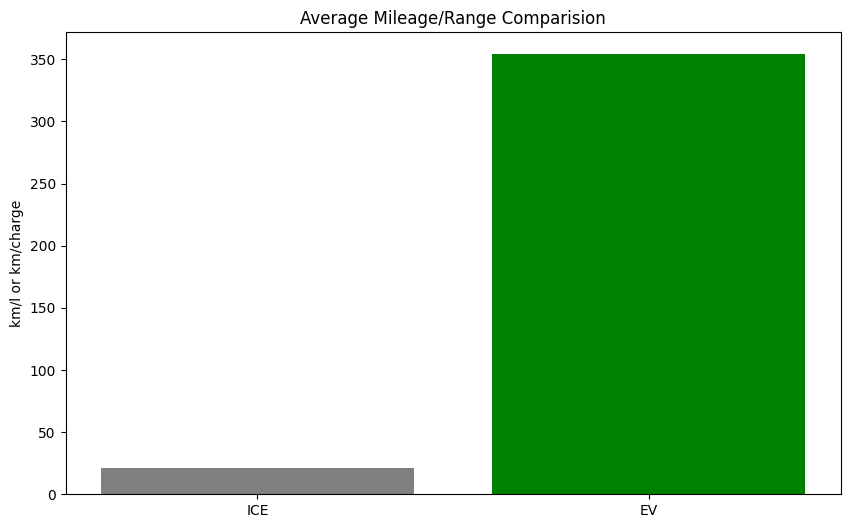

In [39]:
avg_range = car_models.groupby('Is_EV')['Mileage_or_Range'].mean().reset_index()
print(avg_range)

plt.figure(figsize=(10,6))
plt.bar(['ICE', 'EV'], avg_range['Mileage_or_Range'], color = ['grey', 'green'])
plt.title('Average Mileage/Range Comparision')
plt.ylabel('km/l or km/charge')
plt.show()

In [40]:
feature_trend = car_models.groupby('Launch_Period')['Notable Features'].count().reset_index()
print(feature_trend)


  Launch_Period  Notable Features
0     2014–2018              6696
1     2019–2021              4946
2     2022–2024              3358


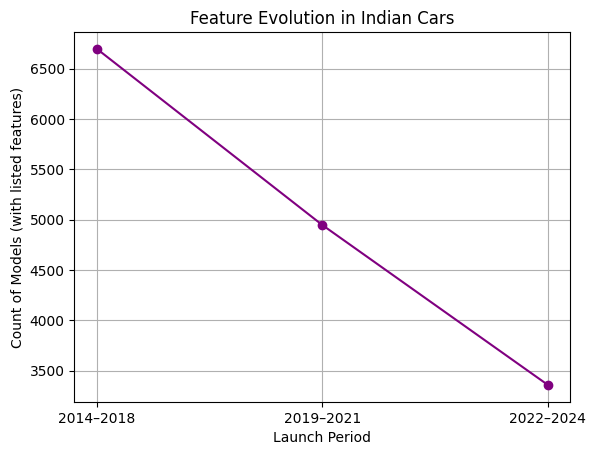

In [41]:
plt.plot(feature_trend["Launch_Period"], feature_trend["Notable Features"], marker='o', color='purple')
plt.title("Feature Evolution in Indian Cars")
plt.xlabel("Launch Period")
plt.ylabel("Count of Models (with listed features)")
plt.grid(True)
plt.show()

In [42]:
car_models[['Min_Price','Mileage_or_Range']].corr()

,Min_Price,Mileage_or_Range
Min_Price,1.000000,0.074166
Mileage_or_Range,0.074166,1.000000


In [43]:
car_models.to_csv('Cleaned car models.csv', index=False)
ev_sales.to_csv('Cleaned EV sales.csv', index=False)